# Importamos las Librerías Necesarias

In [ ]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Crear modelo Word2Vec

In [ ]:
sentences = [['this', 'is', 'a', 'good', 'example'],
             ['we', 'are', 'learning', 'about', 'embeddings']]
model = Word2Vec(sentences, min_count=1)

# Visualizamos Embeddings

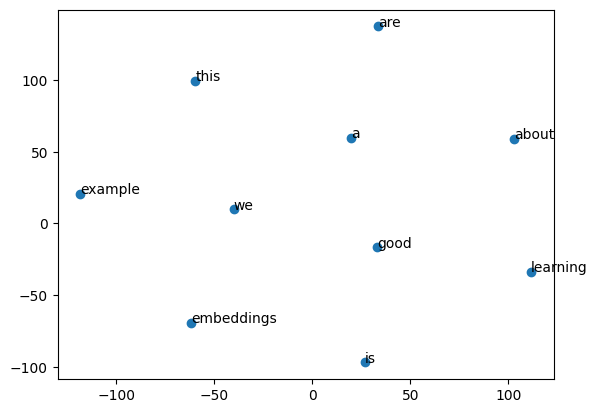

In [ ]:
words = sum(sentences, [])
word_vectors = np.array([model.wv[word] for word in words])

tsne = TSNE(n_components=2, perplexity=len(words)-1)
words_reduced = tsne.fit_transform(word_vectors)

plt.scatter(words_reduced[:, 0], words_reduced[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]))
plt.show()

# Expandimos el conjunto de datos con mayor variedad y complejidad

In [ ]:
extended_sentences = [
    ['this', 'is', 'a', 'good', 'example'],
    ['we', 'are', 'learning', 'about', 'embeddings'],
    ['deep', 'learning', 'is', 'a', 'subfield', 'of', 'machine', 'learning'],
    ['this', 'example', 'is', 'better', 'than', 'the', 'previous', 'one'],
    ['machine', 'learning', 'involves', 'models', 'and', 'data'],
    ['data', 'science', 'is', 'related', 'to', 'data', 'mining', 'and', 'statistics']
]

# Creamos nuevamente el modelo de Word2Vec

In [ ]:
model = Word2Vec(extended_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Volvemos a visualizar

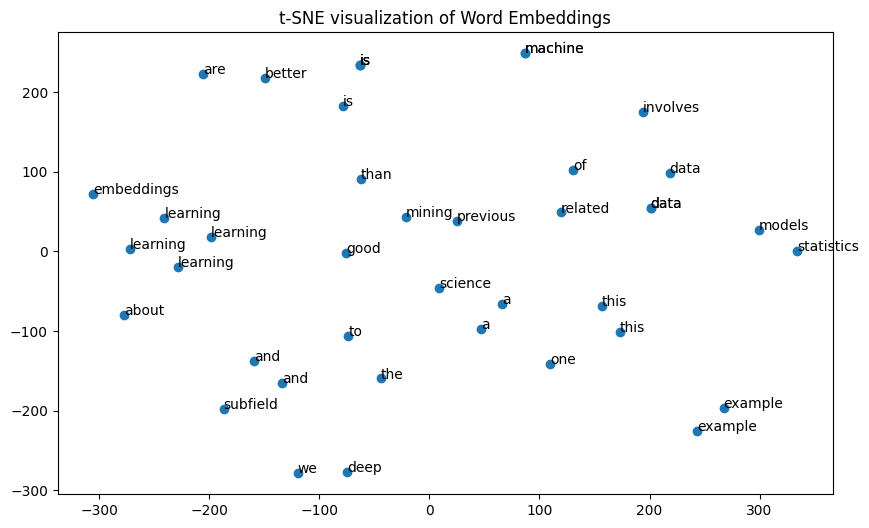

In [ ]:
# Preparar datos para t-SNE
words = sum(extended_sentences, [])
word_vectors = np.array([model.wv[word] for word in words if word in model.wv])

# Reducción de dimensiones con t-SNE
tsne = TSNE(n_components=2, perplexity=10)  # Usamos una perplejidad razonable
words_reduced = tsne.fit_transform(word_vectors)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(words_reduced[:, 0], words_reduced[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(words_reduced[i, 0], words_reduced[i, 1]))
plt.title("t-SNE visualization of Word Embeddings")
plt.show()